# Project 2: ames_test Test File Creation

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import metrics

%config InlineBackend.figure_format='retina'

### Explore the Data

In [5]:
ls

Ames_Housing_Deck.pdf     archive/                  ~$Ames_Housing_Deck.pptx
Ames_Housing_Deck.pptx    code/
README.md                 datasets/


In [40]:
ames_test = pd.read_csv('./datasets/test.csv')

In [41]:
ames_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [42]:
ames_test.columns = ames_test.columns.str.lower().str.replace(' ', '_')


In [43]:
ames_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               878 non-null    int64  
 1   pid              878 non-null    int64  
 2   ms_subclass      878 non-null    int64  
 3   ms_zoning        878 non-null    object 
 4   lot_frontage     718 non-null    float64
 5   lot_area         878 non-null    int64  
 6   street           878 non-null    object 
 7   alley            58 non-null     object 
 8   lot_shape        878 non-null    object 
 9   land_contour     878 non-null    object 
 10  utilities        878 non-null    object 
 11  lot_config       878 non-null    object 
 12  land_slope       878 non-null    object 
 13  neighborhood     878 non-null    object 
 14  condition_1      878 non-null    object 
 15  condition_2      878 non-null    object 
 16  bldg_type        878 non-null    object 
 17  house_style     

In [44]:
#Check for nulls - first 50 columns:
ames_test.isnull().sum().head(50)

id                   0
pid                  0
ms_subclass          0
ms_zoning            0
lot_frontage       160
lot_area             0
street               0
alley              820
lot_shape            0
land_contour         0
utilities            0
lot_config           0
land_slope           0
neighborhood         0
condition_1          0
condition_2          0
bldg_type            0
house_style          0
overall_qual         0
overall_cond         0
year_built           0
year_remod/add       0
roof_style           0
roof_matl            0
exterior_1st         0
exterior_2nd         0
mas_vnr_type         1
mas_vnr_area         1
exter_qual           0
exter_cond           0
foundation           0
bsmt_qual           25
bsmt_cond           25
bsmt_exposure       25
bsmtfin_type_1      25
bsmtfin_sf_1         0
bsmtfin_type_2      25
bsmtfin_sf_2         0
bsmt_unf_sf          0
total_bsmt_sf        0
heating              0
heating_qc           0
central_air          0
electrical 

In [45]:
#Check for nulls - last 35 columns:
ames_test.isnull().sum().tail(35)

2nd_flr_sf           0
low_qual_fin_sf      0
gr_liv_area          0
bsmt_full_bath       0
bsmt_half_bath       0
full_bath            0
half_bath            0
bedroom_abvgr        0
kitchen_abvgr        0
kitchen_qual         0
totrms_abvgrd        0
functional           0
fireplaces           0
fireplace_qu       422
garage_type         44
garage_yr_blt       45
garage_finish       45
garage_cars          0
garage_area          0
garage_qual         45
garage_cond         45
paved_drive          0
wood_deck_sf         0
open_porch_sf        0
enclosed_porch       0
3ssn_porch           0
screen_porch         0
pool_area            0
pool_qc            874
fence              706
misc_feature       837
misc_val             0
mo_sold              0
yr_sold              0
sale_type            0
dtype: int64

In [46]:
ames_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               878 non-null    int64  
 1   pid              878 non-null    int64  
 2   ms_subclass      878 non-null    int64  
 3   ms_zoning        878 non-null    object 
 4   lot_frontage     718 non-null    float64
 5   lot_area         878 non-null    int64  
 6   street           878 non-null    object 
 7   alley            58 non-null     object 
 8   lot_shape        878 non-null    object 
 9   land_contour     878 non-null    object 
 10  utilities        878 non-null    object 
 11  lot_config       878 non-null    object 
 12  land_slope       878 non-null    object 
 13  neighborhood     878 non-null    object 
 14  condition_1      878 non-null    object 
 15  condition_2      878 non-null    object 
 16  bldg_type        878 non-null    object 
 17  house_style     

In [47]:
# Looking at frequency of values for various columns:
#ames_test['ms_subclass'].value_counts() # Use individual components of this rather than this summarized metric +
#ames_test['ms_zoning'].value_counts(dropna=False) # Dummify top 3, roll together rest +
#ames_test['street'].value_counts() # Only 7 unpaved
#ames_test['alley'].value_counts(dropna=False) # Almost all null. Only 140 observations. 
#ames_test['lot_shape'].value_counts(dropna=False) # Reg 63%, Irreg 37% - Roll Irregs together if using +
#ames_test['land_contour'].value_counts(dropna=False) # Very few non-flat properties
#ames_test['land_slope'].value_counts(dropna=False) # 98 mod-severe slopes = 4% of data - too unbalanced
#ames_test['utilities'].value_counts(dropna=False) # Don't use, everyone has utilities
#ames_test['lot_config'].value_counts(dropna=False) # Inside, Corner, CulDSac could be interesting to Dummify +
#ames_test['neighborhood'].value_counts(normalize=True, dropna=False) # 28 neighborhoods, maybe dummify? +
#len(ames_test['neighborhood'].unique())
#ames_test['condition_1'].value_counts(normalize=True, dropna=False) # 15% have conditions, pull out RR? +
#ames_test['condition_2'].value_counts(normalize=True, dropna=False) # 98 of properties have no secondary conditions
#ames_test['bldg_type'].value_counts(normalize=True, dropna=False) # 83% Sing fam. Compare to ms_subclass. +
# ames_test['house_style'].value_counts(normalize=True, dropna=False) # Compare to sm_subclass. Seems to be rollup +
# ames_test['overall_qual'].value_counts(normalize=True, dropna=False) # Most are 5-8. Bell curve. 
# ames_test['overall_cond'].value_counts(normalize=True, dropna=False) # Most are 5-7, no 10's.
# ames_test['year_built'].value_counts(normalize=True, dropna=False) # Consider bucketing, creating house age +
# ames_test['roof_style'].value_counts(normalize=True, dropna=False) # All Gable or Hip. Not likely predictive. 
# ames_test['roof_matl'].value_counts(normalize=True, dropna=False) # 98% CompShg - don't use
# ames_test['exterior_1st'].value_counts(normalize=True, dropna=False) # 15 values. Seems unlikely to be predictive
# ames_test['foundation'].value_counts(normalize=True, dropna=False) # 6 values, 3 with 98%. Unlikely to be predictive. 
# ames_test['bsmt_qual'].value_counts(normalize=True, dropna=False) # basement height - not likely predictive
# ames_test['bsmt_cond'].value_counts(normalize=True, dropna=False) # 96% Fair, Typical or Good - binarize if used +
ames_test['bsmtfin_type_1'].value_counts(normalize=True, dropna=False) # could be interesting dummies or binary +
# ames_test['heating'].value_counts(normalize=True, dropna=False) # 98% GasA
# ames_test['central_air'].value_counts(normalize=True, dropna=False) # 93% yes - could be predictive because Iowas gets HOT +
# ames_test['bsmt_full_bath'].value_counts(normalize=True, dropna=False) # Create a total bathrooms column +
# ames_test['garage_type'].value_counts(dropna=False) # 6 types plus nulls. Nulls probably mean no garage. Replace with "None"
ames_test['garage_cars'].value_counts(dropna=False) # roll together into 0, 1, 2, 3+ if using. Get rid of 1 null.
# ames_test['paved_drive'].value_counts(normalize=True,dropna=False) # 90% paved. Could be predictive, but unlikely.
# ames_test['pool_qc'].value_counts(normalize=True,dropna=False) # 99% no pool. If used, turn into boolean Pool Y/N
# ames_test['fence'].value_counts(normalize=True,dropna=False) # 80% no fence. If used, turn into boolean Fence Y/N
# ames_test['bedroom_abvgr'].value_counts(dropna=False)
# ames_test['kitchen_abvgr'].value_counts(dropna=False) # Are these houses with multple kitchens?
# ames_test['totrms_abvgrd'].value_counts(normalize=True, dropna=False) # Could be predictive
# ames_test['fireplaces'].value_counts(normalize=True, dropna=False) # Turn into binary?
# ames_test['functional'].value_counts(normalize=True, dropna=False) # 93% are typical functionality. Might be predictive? Make binary?
# ames_test['misc_feature'].value_counts(dropna=False) # 97% have none


2    467
1    254
3    110
0     44
4      3
Name: garage_cars, dtype: int64

### Feature Engineering

#### Square Footage

In [48]:
# Figuring our how the square footage columns fit together.
# Based on this, I'm going to create a full square footage field that includes above ground and basement sq ft. 
# Based on this, I'm going to roll together porch fields into single sq footage field. 
ames_test[['1st_flr_sf', '2nd_flr_sf', 'gr_liv_area', 'total_bsmt_sf', 'garage_area', 'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch','pool_area']].head(30)

,1st_flr_sf,2nd_flr_sf,gr_liv_area,total_bsmt_sf,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area
0,908,1020,1928,1020,440,0,60,112,0,0,0
1,1967,0,1967,1967,580,170,0,0,0,0,0
2,664,832,1496,654,426,100,24,0,0,0,0
3,968,0,968,968,480,0,0,184,0,0,0
4,1394,0,1394,1394,514,0,76,0,0,185,0
5,546,546,1092,546,286,0,0,64,0,0,0
6,1093,0,1093,869,308,0,0,0,0,0,0
7,1268,0,1268,1268,252,173,0,0,0,0,0
8,840,840,1680,840,588,0,111,0,0,0,0
9,1279,0,1279,1196,473,238,83,0,0,0,0


In [49]:
# Create total house square footage from above ground sf and basement sf:
ames_test['total_house_sf'] = ames_test['gr_liv_area'] + ames_test['total_bsmt_sf']

In [50]:
# Create porch square footage from all porch columns:
ames_test['porch_sf'] = ames_test['wood_deck_sf'] + ames_test['open_porch_sf'] + ames_test['open_porch_sf'] + ames_test['enclosed_porch'] + ames_test['3ssn_porch'] + ames_test['screen_porch']

In [51]:
ames_test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,total_house_sf,porch_sf
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,2948,232
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,8,2006,WD,3934,170
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,9,2006,New,2150,148
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,7,2007,WD,1936,184
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,7,2009,WD,2788,337


#### Bathroom Count

In [52]:
# Figuring out how bathrooms columns work together:
ames_test[['bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath']].head(10)

,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath
0,0,0,2,0
1,0,0,2,0
2,1,0,2,1
3,0,0,1,0
4,1,0,1,1
5,0,0,1,1
6,0,0,1,0
7,0,0,1,1
8,0,0,2,1
9,0,1,2,0


In [53]:
# Create total bathroom column:
ames_test['baths'] = ames_test['bsmt_full_bath'] + ames_test['full_bath'] + (ames_test['bsmt_half_bath'] / 2) + (ames_test['half_bath'] / 2)

In [54]:
ames_test['baths'].head(10)

0    2.0
1    2.0
2    3.5
3    1.0
4    2.5
5    1.5
6    1.0
7    1.5
8    2.5
9    2.5
Name: baths, dtype: float64

#### Lot & Zone Types

In [55]:
# Rolling low count zones together before dummifying. 

def zone_group(data):
    if data['ms_zoning'] in ('RL','RM','FV'):
        return data['ms_zoning']
    else:
        return 'OT'

In [56]:
ames_test['zone'] = ames_test.apply(lambda data: zone_group(data), axis=1)

In [57]:
ames_test = pd.get_dummies(data=ames_test, columns=['zone'])

In [58]:
# Dummify lot_config.
ames_test = pd.get_dummies(data=ames_test, columns=['lot_config'])

In [59]:
# Dropping columns for lot_confs with few observations, taking place of "drop first":
ames_test.drop(columns=['lot_config_FR3', 'lot_config_FR2'], inplace=True)

#### House Type, Style & Build Date

In [60]:
# Figuring out how these fields work together:
# MS Subclass is a blended metric (like a prebuilt polynomial) but since we don't know the weight of the individual elements, I'm going to use those instead.
ames_test['ms_subclass']

ames_test[['ms_subclass', 'bldg_type', 'house_style', 'year_built', 'year_remod/add']].head(30)

,ms_subclass,bldg_type,house_style,year_built,year_remod/add
0,190,2fmCon,2Story,1910,1950
1,90,Duplex,1Story,1977,1977
2,60,1Fam,2Story,2006,2006
3,30,1Fam,1Story,1923,2006
4,20,1Fam,1Story,1963,1963
5,160,TwnhsE,2Story,1972,1972
6,20,1Fam,1Story,1958,2006
7,20,1Fam,1Story,1977,1989
8,160,TwnhsE,2Story,2004,2004
9,20,1Fam,1Story,1977,1977


In [61]:
ames_test['bldg_type'].value_counts()

1Fam      724
TwnhsE     72
Duplex     34
Twnhs      32
2fmCon     16
Name: bldg_type, dtype: int64

In [62]:
# Create three buckets for building type, then dummify:
def building(data):
    if data['bldg_type'] == '1Fam':
        return '1Fam'
    elif data['bldg_type'] in ('TwnhsE', 'Twnhs'):
        return 'Twnhs'
    else:
        return 'Duplex'

In [63]:
ames_test['house_type'] = ames_test.apply(lambda data: building(data), axis=1)

In [64]:
ames_test = pd.get_dummies(data=ames_test, columns=['house_type'])

In [65]:
# Create three buckets for home age, then dummify:
def home_age(data):
    if data['year_built'] >= 1980:
        return '1980+'
    elif data['year_built'] >= 1945:
        return '1945-1979'
    else:
        return '1872-1944'

In [66]:
ames_test['home_age'] = ames_test.apply(lambda data: home_age(data), axis=1)

In [67]:
ames_test[['year_built','home_age']]

,year_built,home_age
0,1910,1872-1944
1,1977,1945-1979
2,2006,1980+
3,1923,1872-1944
4,1963,1945-1979
...,...,...
873,1974,1945-1979
874,1966,1945-1979
875,1968,1945-1979
876,1971,1945-1979


In [68]:
ames_test = pd.get_dummies(data=ames_test, columns=['home_age'])

In [69]:
# Drop one column from each dummy set since I didn't do that when I created dummies.
ames_test.drop(columns=['home_age_1872-1944', 'zone_OT', 'house_type_Duplex'], inplace=True)

In [70]:
# Changed my mind about how I named these columns:
ames_test.rename(columns={'home_age_1980+': 'date_blt_1980-2010', 
                     'home_age_1945-1979': 'date_blt_1945-1979'}, 
            inplace=True)

In [71]:
# Creating new columns for numeric age of house:
ames_test['home_age'] = 2010 - ames_test['year_built']

In [72]:
# Checking all date/age fields to make sure they are accurate:
ames_test[['year_built','date_blt_1980-2010', 'date_blt_1945-1979', 'home_age']].head(20)

,year_built,date_blt_1980-2010,date_blt_1945-1979,home_age
0,1910,0,0,100
1,1977,0,1,33
2,2006,1,0,4
3,1923,0,0,87
4,1963,0,1,47
5,1972,0,1,38
6,1958,0,1,52
7,1977,0,1,33
8,2004,1,0,6
9,1977,0,1,33


#### Basements

In [74]:
# Deep dive into basement features to see if any have strong correlation to price.
# First separating out data for ease of analysis:
ames_test_bsmts = ames_test[['bsmtfin_type_1', 'bsmtfin_type_2', 'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure']]

In [75]:
ames_test_bsmts.isnull().sum()

bsmtfin_type_1    25
bsmtfin_type_2    25
bsmtfin_sf_1       0
bsmtfin_sf_2       0
bsmt_unf_sf        0
bsmt_qual         25
bsmt_cond         25
bsmt_exposure     25
dtype: int64

In [1502]:
ames_test_bsmts.corr()

,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,saleprice
bsmtfin_sf_1,1.000000,-0.050249,-0.473488,0.423519
bsmtfin_sf_2,-0.050249,1.000000,-0.231330,0.016255
bsmt_unf_sf,-0.473488,-0.231330,1.000000,0.190210
saleprice,0.423519,0.016255,0.190210,1.000000


In [76]:
# Change basement condition to a numeric value so it can be modeled, and used in polynomial feature:
def bsmt_int(data):
    if data['bsmt_cond'] == 'Ex':
        return 5
    elif data['bsmt_cond'] == 'Gd':
        return 4
    elif data['bsmt_cond'] == 'TA':
        return 3
    elif data['bsmt_cond'] == 'Fa':
        return 2
    elif data['bsmt_cond'] == 'Po':
        return 1
    else:
        return 0

In [77]:
ames_test_bsmts['bsmt_cond_2'] = ames_test_bsmts.apply(lambda data: bsmt_int(data), axis=1)

<ipython-input-77-97e7cdec858b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ames_test_bsmts['bsmt_cond_2'] = ames_test_bsmts.apply(lambda data: bsmt_int(data), axis=1)


In [78]:
# Change basement condition to a numeric value so it can be modeled, and used in polynomial feature:
def bsmt_hgt(data):
    if data['bsmt_qual'] == 'Ex':
        return 5
    elif data['bsmt_qual'] == 'Gd':
        return 4
    elif data['bsmt_qual'] == 'TA':
        return 3
    elif data['bsmt_qual'] == 'Fa':
        return 2
    elif data['bsmt_qual'] == 'Po':
        return 1
    else:
        return 0

In [79]:
ames_test_bsmts['bsmt_qual_2'] = ames_test_bsmts.apply(lambda data: bsmt_hgt(data), axis=1)

<ipython-input-79-8184a037a751>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ames_test_bsmts['bsmt_qual_2'] = ames_test_bsmts.apply(lambda data: bsmt_hgt(data), axis=1)


In [80]:
ames_test_bsmts['bsmt_sf'] = ames_test_bsmts['bsmtfin_sf_1'] + ames_test_bsmts['bsmtfin_sf_2'] + ames_test_bsmts['bsmt_unf_sf']

<ipython-input-80-d3d64b6be7a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ames_test_bsmts['bsmt_sf'] = ames_test_bsmts['bsmtfin_sf_1'] + ames_test_bsmts['bsmtfin_sf_2'] + ames_test_bsmts['bsmt_unf_sf']


In [81]:
ames_test_bsmts['bsmt_sf_x_cond2'] = ames_test_bsmts['bsmt_cond_2'] * ames_test_bsmts['bsmt_sf']

<ipython-input-81-4e7a5cae310e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ames_test_bsmts['bsmt_sf_x_cond2'] = ames_test_bsmts['bsmt_cond_2'] * ames_test_bsmts['bsmt_sf']


In [82]:
ames_test_bsmts['bsmt_sf_x_hgt'] = ames_test_bsmts['bsmt_qual_2'] * ames_test_bsmts['bsmt_sf']

<ipython-input-82-6049aaecb778>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ames_test_bsmts['bsmt_sf_x_hgt'] = ames_test_bsmts['bsmt_qual_2'] * ames_test_bsmts['bsmt_sf']


In [83]:
ames_test_bsmts.corr()

,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,bsmt_cond_2,bsmt_qual_2,bsmt_sf,bsmt_sf_x_cond2,bsmt_sf_x_hgt
bsmtfin_sf_1,1.000000,-0.062397,-0.498344,0.167759,0.351555,0.519852,0.506242,0.527660
bsmtfin_sf_2,-0.062397,1.000000,-0.255002,0.107647,-0.033240,0.103035,0.127535,0.028904
bsmt_unf_sf,-0.498344,-0.255002,1.000000,0.168149,0.244811,0.392114,0.371358,0.347346
bsmt_cond_2,0.167759,0.107647,0.168149,1.000000,0.629599,0.397743,0.490077,0.318852
bsmt_qual_2,0.351555,-0.033240,0.244811,0.629599,1.000000,0.610807,0.616902,0.743300
bsmt_sf,0.519852,0.103035,0.392114,0.397743,0.610807,1.000000,0.974757,0.930106
bsmt_sf_x_cond2,0.506242,0.127535,0.371358,0.490077,0.616902,0.974757,1.000000,0.917056
bsmt_sf_x_hgt,0.527660,0.028904,0.347346,0.318852,0.743300,0.930106,0.917056,1.000000


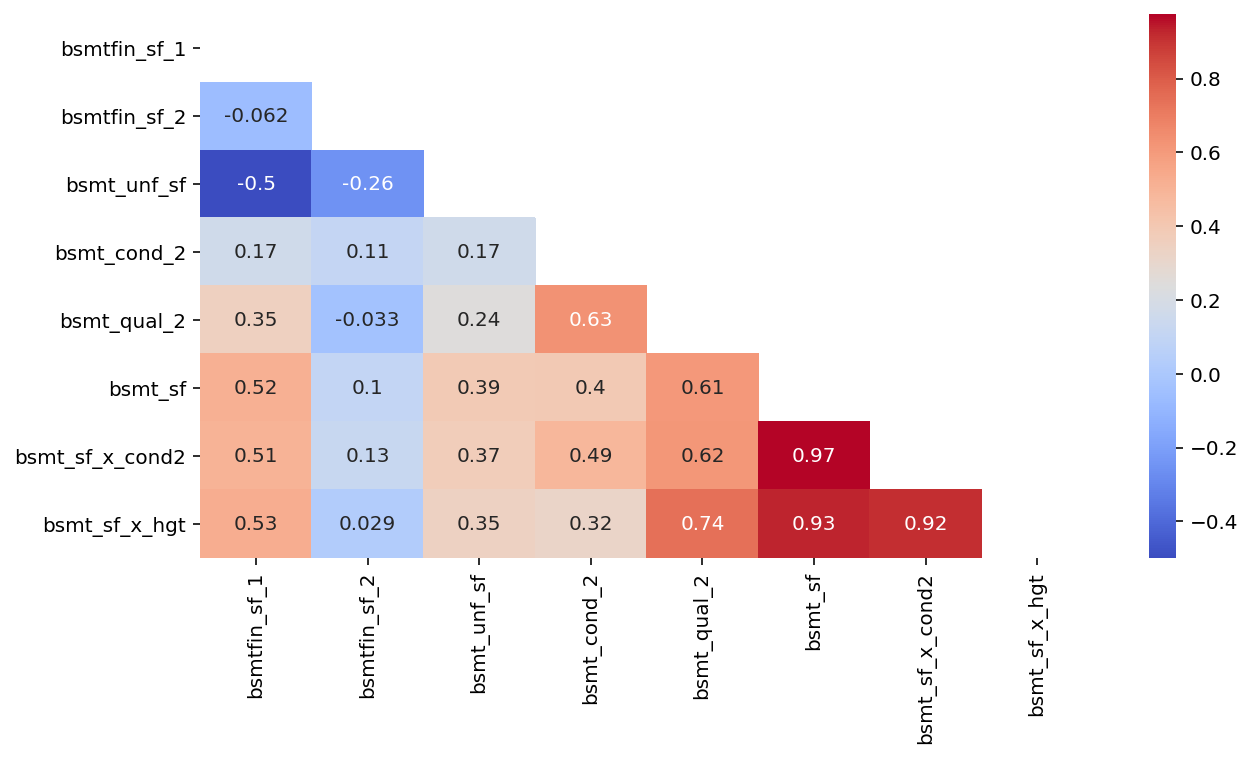

In [84]:
# Let's heatmap it:
mask = np.zeros_like(ames_test_bsmts.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10,5))
sns.heatmap(
    ames_test_bsmts.corr(),
    cmap='coolwarm',
    annot=True,
    mask=mask
);

In [85]:
# Adding high correlation basement features to the main dataset:

ames_test['bsmt_qual_2'] = ames_test.apply(lambda data: bsmt_hgt(data), axis=1)
ames_test['bsmt_sf'] = ames_test['bsmtfin_sf_1'] + ames_test['bsmtfin_sf_2'] + ames_test['bsmt_unf_sf']
ames_test['bsmt_cond_2'] = ames_test.apply(lambda data: bsmt_int(data), axis=1)
ames_test['bsmt_sf_x_cond2'] = ames_test['bsmt_cond_2'] * ames_test['bsmt_sf']
ames_test['bsmt_sf_x_hgt'] = ames_test['bsmt_qual_2'] * ames_test['bsmt_sf']

In [86]:
ames_test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,house_type_1Fam,house_type_Twnhs,date_blt_1945-1979,date_blt_1980-2010,home_age,bsmt_qual_2,bsmt_sf,bsmt_cond_2,bsmt_sf_x_cond2,bsmt_sf_x_hgt
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,0,100,2,1020,3,3060,2040
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,1,0,33,4,1967,3,5901,7868
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,1,0,0,1,4,4,654,4,2616,2616
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,1,0,0,0,87,3,968,3,2904,2904
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,1,0,1,0,47,4,1394,3,4182,5576


#### Exterior Condition & Quality

In [87]:
# Changing Exterior quality and condition into numeric features for modeling:

def ext_int(data):
    if data['exter_qual'] == 'Ex':
        return 5
    elif data['exter_qual'] == 'Gd':
        return 4
    elif data['exter_qual'] == 'TA':
        return 3
    elif data['exter_qual'] == 'Fa':
        return 2
    elif data['exter_qual'] == 'Po':
        return 1
    else:
        return 0

In [88]:
ames_test['exter_qual2'] = ames_test.apply(lambda data: ext_int(data), axis=1)

In [89]:
def ext_int(data):
    if data['exter_cond'] == 'Ex':
        return 5
    elif data['exter_cond'] == 'Gd':
        return 4
    elif data['exter_cond'] == 'TA':
        return 3
    elif data['exter_cond'] == 'Fa':
        return 2
    elif data['exter_cond'] == 'Po':
        return 1
    else:
        return 0

In [90]:
ames_test['exter_cond2'] = ames_test.apply(lambda data: ext_int(data), axis=1)

In [91]:
ames_test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,date_blt_1945-1979,date_blt_1980-2010,home_age,bsmt_qual_2,bsmt_sf,bsmt_cond_2,bsmt_sf_x_cond2,bsmt_sf_x_hgt,exter_qual2,exter_cond2
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,100,2,1020,3,3060,2040,3,2
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,1,0,33,4,1967,3,5901,7868,3,3
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,1,4,4,654,4,2616,2616,4,3
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,87,3,968,3,2904,2904,4,3
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,1,0,47,4,1394,3,4182,5576,3,3


#### Neighborhoods

In [95]:
# Dummifying all neighborhoods in main dataset: ames_test 
# I'm not dropping first because I'm going to remove some neighborhoods after dummifying.
# Observations where False for all neighborhood params can be assumed to be included in "all other neighbors"
ames_test = pd.get_dummies(data=ames_test, columns=['neighborhood'])

In [96]:
ames_test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,1,0,0,0,0,0,0,0
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,0,1,0,0,0,0,0
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,0,0,0,0,0,0,0
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,1,0,0,0,0,0,0,0
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,0,0,0,0,0,0,0,0,0


In [98]:
# Dropping columns for all neighborhoods with low number of observations and/or low correlation to price:
# This is in lieu of dropping first. 
ames_test.drop(columns=[
                   'neighborhood_Greens',
                   'neighborhood_Blueste',
                   'neighborhood_Veenker',
                   'neighborhood_SWISU',
                   'neighborhood_NPkVill',
                   'neighborhood_MeadowV',
                   'neighborhood_ClearCr',
                   'neighborhood_BrDale',
                   'neighborhood_Blmngtn'
                        ], inplace=True)

In [99]:
ames_test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,neighborhood_NAmes,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,0,1,0,0,0,0,0
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,0,0,1,0,0,0,0
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,0,0,0,0,0,0,0
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,0,1,0,0,0,0,0
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,1,0,0,0,0,0,0,0,0,0


#### Binarize Various Columns

The following features are ones that I feel are not worth dummifying. Instead, a single column that simply indicates a particular level of quality, or the presence of a feature (is there a fence or not) seems like it would be a tighter predictor than retaining all the various values via dummifying. Also, some variables have a small number of observations for one or more values, so this means we can retain that info in rolled up form. Also, this clears out null values for many fields, by assuming a null is a negative for that feature. 

In [100]:
ames_test['bsmt_cond'].value_counts(dropna=False)

TA     781
Fa      39
Gd      33
NaN     25
Name: bsmt_cond, dtype: int64

In [101]:
ames_test['bsmt_ok_yn'] = ames_test.bsmt_cond.map(lambda b: True if b in ('TA', 'Gd', 'Ex') else False)

In [102]:
ames_test['fireplace_yn'] = ames_test.fireplaces.map(lambda fp: False if fp == 0 else True)

In [103]:
ames_test['pool_yn'] = ames_test.pool_area.map(lambda p: False if p == 0 else True)

In [104]:
ames_test['fence_yn'] = ames_test.fence.map(lambda f: True if f in ('MnPrv', 'GdPrv', 'GdWo', 'MnWw') else False)

In [105]:
ames_test['railroad_yn'] = ames_test.condition_1.map(lambda rr: True if rr in ('RRAn', 'RRAe', 'RRNn', 'RRNe') else False)

In [106]:
ames_test['central_air'] = ames_test.central_air.map(lambda air: True if air == 'Y' else False)

In [107]:
ames_test['lotshape_reg_yn'] = ames_test.lot_shape.map(lambda lot: True if lot == 'Reg' else False)

In [108]:
ames_test['bsmt_usable_yn'] = ames_test.bsmtfin_type_1.map(lambda q: True if q in ('GLQ', 'ALQ', 'Rec') else False)

In [109]:
ames_test['remodeled'] = ames_test['year_remod/add'] - ames_test['year_built']
ames_test['remodel_yn'] = ames_test.remodeled.map(lambda x: True if x > 0 else False)

In [110]:
# Verifying remodel_yn populated correctly.
ames_test[['year_built', 'year_remod/add', 'remodel_yn', 'remodeled']]

,year_built,year_remod/add,remodel_yn,remodeled
0,1910,1950,True,40
1,1977,1977,False,0
2,2006,2006,False,0
3,1923,2006,True,83
4,1963,1963,False,0
...,...,...,...,...
873,1974,1974,False,0
874,1966,1999,True,33
875,1968,1968,False,0
876,1971,1971,False,0


#### Correct Null Values

In [111]:
# Replace null garage values with None:
ames_test['garage_type'] = ames_test.garage_type.apply(lambda g: 'None' if g is np.nan else g)

In [112]:
# Verifying null replacement worked:
ames_test['garage_type'].value_counts(dropna=False)

Attchd     518
Detchd     246
BuiltIn     53
None        44
Basment      9
2Types       4
CarPort      4
Name: garage_type, dtype: int64

In [113]:
# Replacing null lot_frontage with 0'snusing technique Sophie showed me, because null != null:
ames_test['lot_frontage'] = ames_test.lot_frontage.apply(lambda x: 0 if x != x else x)

In [114]:
ames_test.isnull().sum().head(10)

id                0
pid               0
ms_subclass       0
ms_zoning         0
lot_frontage      0
lot_area          0
street            0
alley           820
lot_shape         0
land_contour      0
dtype: int64

In [118]:
ames_test.isnull().sum().head(50)

id                   0
pid                  0
ms_subclass          0
ms_zoning            0
lot_frontage         0
lot_area             0
street               0
alley              820
lot_shape            0
land_contour         0
utilities            0
land_slope           0
condition_1          0
condition_2          0
bldg_type            0
house_style          0
overall_qual         0
overall_cond         0
year_built           0
year_remod/add       0
roof_style           0
roof_matl            0
exterior_1st         0
exterior_2nd         0
mas_vnr_type         1
mas_vnr_area         1
exter_qual           0
exter_cond           0
foundation           0
bsmt_qual           25
bsmt_cond           25
bsmt_exposure       25
bsmtfin_type_1      25
bsmtfin_sf_1         0
bsmtfin_type_2      25
bsmtfin_sf_2         0
bsmt_unf_sf          0
total_bsmt_sf        0
heating              0
heating_qc           0
central_air          0
electrical           1
1st_flr_sf           0
2nd_flr_sf 

In [120]:
# Create some polynomial features:

ames_test['house_sf_x_overall_qual'] = ames_test['total_house_sf'] * ames_test['overall_qual']
ames_test['overall_qual_x_overall_cond'] = ames_test['overall_cond'] * ames_test['overall_qual']


ames_test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,fireplace_yn,pool_yn,fence_yn,railroad_yn,lotshape_reg_yn,bsmt_usable_yn,remodeled,remodel_yn,house_sf_x_overall_qual,overall_qual_x_overall_cond
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,False,False,False,False,True,False,40,True,17688,48
1,2718,905108090,90,RL,0.0,9662,Pave,NaN,IR1,Lvl,...,False,False,False,False,False,False,0,False,19670,20
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,True,False,False,False,False,True,0,False,15050,35
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,False,False,False,False,True,False,83,True,9680,30
4,625,535105100,20,RL,0.0,9500,Pave,NaN,IR1,Lvl,...,True,False,False,False,False,False,0,False,16728,30


### Look at Correlations

In [124]:
# Create and EDA final dataset - doing this simply so the data is more manageable
# ames_test_lite is a first pass as reducing my features to those most likely to be predictive in my model:
ames_test_lite = ames_test[['id',
                 'lot_area', 
                 'lot_frontage',
                 'overall_qual', 
                 'overall_cond', 
                 'exter_qual2',
                 'exter_cond2', 
                 'year_built', 
                 'year_remod/add',
                 'home_age', 
                 'total_house_sf', 
                 'porch_sf',
                 'gr_liv_area',
                 'bsmt_sf',
                 'totrms_abvgrd',
                 'bedroom_abvgr',
                 'baths', 
                 'date_blt_1945-1979', 
                 'date_blt_1980-2010', 
                 'lot_config_Corner', 
                 'lot_config_CulDSac', 
                 'lot_config_Inside', 
                 'lotshape_reg_yn', 
                 'zone_FV', 
                 'zone_RL', 
                 'zone_RM', 
                 'house_type_1Fam', 
                 'house_type_Twnhs', 
                 'neighborhood_Edwards', 
                 'neighborhood_IDOTRR', 
                 'neighborhood_NoRidge', 
                 'neighborhood_NridgHt', 
                 'neighborhood_OldTown', 
                 'neighborhood_StoneBr',
                 'neighborhood_NAmes',
                 'remodel_yn',
                 'fireplaces',
                 'fireplace_yn', 
                 'pool_yn', 
                 'fence_yn', 
                 'railroad_yn', 
                 'garage_cars',
                 'bsmt_ok_yn',
                 'bsmt_usable_yn',
                 'bsmt_cond_2',
                 'bsmt_qual_2',
                 'house_sf_x_overall_qual',
                 'overall_qual_x_overall_cond',
                 'bsmt_sf_x_cond2',
                 'bsmt_sf_x_hgt'
                ]]

In [125]:
ames_test_lite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           878 non-null    int64  
 1   lot_area                     878 non-null    int64  
 2   lot_frontage                 878 non-null    float64
 3   overall_qual                 878 non-null    int64  
 4   overall_cond                 878 non-null    int64  
 5   exter_qual2                  878 non-null    int64  
 6   exter_cond2                  878 non-null    int64  
 7   year_built                   878 non-null    int64  
 8   year_remod/add               878 non-null    int64  
 9   home_age                     878 non-null    int64  
 10  total_house_sf               878 non-null    int64  
 11  porch_sf                     878 non-null    int64  
 12  gr_liv_area                  878 non-null    int64  
 13  bsmt_sf             

In [1565]:
ames_test_lite.isnull().sum()

lot_area                       0
lot_frontage                   0
overall_qual                   0
overall_cond                   0
exter_qual2                    0
exter_cond2                    0
year_built                     0
year_remod/add                 0
home_age                       0
total_house_sf                 0
porch_sf                       0
gr_liv_area                    0
bsmt_sf                        0
totrms_abvgrd                  0
bedroom_abvgr                  0
baths                          0
date_blt_1945-1979             0
date_blt_1980-2010             0
lot_config_Corner              0
lot_config_CulDSac             0
lot_config_Inside              0
lotshape_reg_yn                0
zone_FV                        0
zone_RL                        0
zone_RM                        0
house_type_1Fam                0
house_type_Twnhs               0
neighborhood_Edwards           0
neighborhood_IDOTRR            0
neighborhood_NAmes             0
neighborho

In [1566]:
ames_test_lite.shape

(2026, 50)

### Export Final Project Dataset

In [126]:
ls

Ames_Housing_Deck.pdf     archive/                  ~$Ames_Housing_Deck.pptx
Ames_Housing_Deck.pptx    code/
README.md                 datasets/


In [127]:
ames_test_lite.to_csv('./datasets/ames_test_transform.csv')